## Pandas

---

Aqui você conta uma historinha (pra boi dormir) onde você irá embutir os seus códigos Python para a análise de dados.

Nesse exemplo, vamos analisar o ***dataset*** da taxa de cancelamentos de planos dos usários da empresa farmaceutica **Umbrella Corporation**

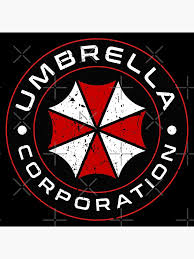

## Trazendo os dados do _dataset_ para o _notebook_:

In [ ]:
# importa a biblioteca pandas
import pandas as pd

# Lê os dados do dataset
tabela = pd.read_csv('cancelamentos.csv')

# mostra o dataset na tela
display(tabela)

Agora, vou eliminar da consulta dados desnecessários. Vou eliminar o ID do usuário.

In [ ]:
tabela = tabela.drop('CustomerID', axis=1)
display(tabela)

Vamos descobrir quantas linhas com informações vazias nós temos

In [ ]:
display(tabela.info())

Vamos eliminar as celulas vazias da nossa consulta

In [ ]:
tabela = tabela.dropna()
display(tabela.info())

Vamos contar quantos usuários cancelaram, e quantos não cancelaram

In [ ]:
display(tabela['cancelou'].value_counts())

Traduzindo em porcentagem

In [ ]:
display(tabela['cancelou'].value_counts(normalize=True).map('{:.2%}'.format))

Próxima análise de dados vai ser para verificar a duração dos contratos

In [ ]:
display(tabela['duracao_contrato'].value_counts())
display(tabela['duracao_contrato'].value_counts(normalize=True).map('{:.2%}'.format))

Vamos agrupar as informações da duração do contrato:

In [ ]:
display(tabela.groupby('duracao_contrato').mean(numeric_only=True))

Vamos eliminar os dados dos contratos mensais.

In [ ]:
tabela = tabela[tabela['duracao_contrato'] != 'Monthly']
display(tabela)
display(tabela['cancelou'].value_counts())
display(tabela['cancelou'].value_counts(normalize=True).map('{:.2%}'.format))

Vamos dar uma olhada nos tipos de planos de assinaturas.

In [ ]:
display(tabela['assinatura'].value_counts(normalize=True).map('{:.2%}'.format))
display(tabela.groupby('assinatura').mean(numeric_only=True))

Vamos passar a analisar os dados das assinaturas olhando os gráficos de cada coluna:

In [ ]:
import plotly.express as px

for coluna in tabela.columns:
    grafico = px.histogram(tabela,x=coluna, color='cancelou', width=600)
    grafico.show()

Achamos as anomalias: ligações para call center e dias de atraso. Os clientes com mais de 20 dias de atraso cancelaram as assinaturas, enquanto que os clientes que fizeram mais de 5 ligações para o call center, todos cancelaram as suas assinaturas.

In [ ]:
tabela = tabela[tabela['ligacoes_callcenter'] < 5]
tabela = tabela[tabela['dias_atraso'] <= 20]
display(tabela)
display(tabela['cancelou'].value_counts())
display(tabela['cancelou'].value_counts(normalize=True).map('{:.2%}'.format))